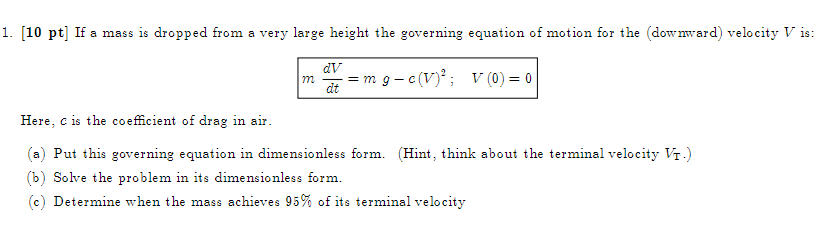

In [149]:
import numpy as np
import matplotlib.pyplot as plt

In [150]:
def model(v, g):
    dvdt = g * (1- v**2)
    return dvdt

# Fourth-order Runge-Kutta integration
def rk4(v, t, dt, g):
    k1 = dt * model(v, g)
    k2 = dt * model(v + 0.5 * k1, g)
    k3 = dt * model(v + 0.5 * k2, g)
    k4 = dt * model(v + k3, g)
    
    v_new = v + (k1 + 2*k2 + 2*k3 + k4) / 6.0
    return v_new

# Parameters
g = 9.81  # m/s^2, gravitational acceleration

# Time array
t = np.linspace(0, 1, 500)
dt = t[1] - t[0]

# Integrate using RK4
v = np.zeros_like(t)
v[0] = 0  # Initial condition

for i in range(1, len(t)):
    v[i] = rk4(v[i-1], t[i-1], dt, g)

# Find the time when v=0.95
idx = np.where(v >= 0.95)[0][0]
time_95 = t[idx]
slope_at_time_95 = model(v[idx], g)

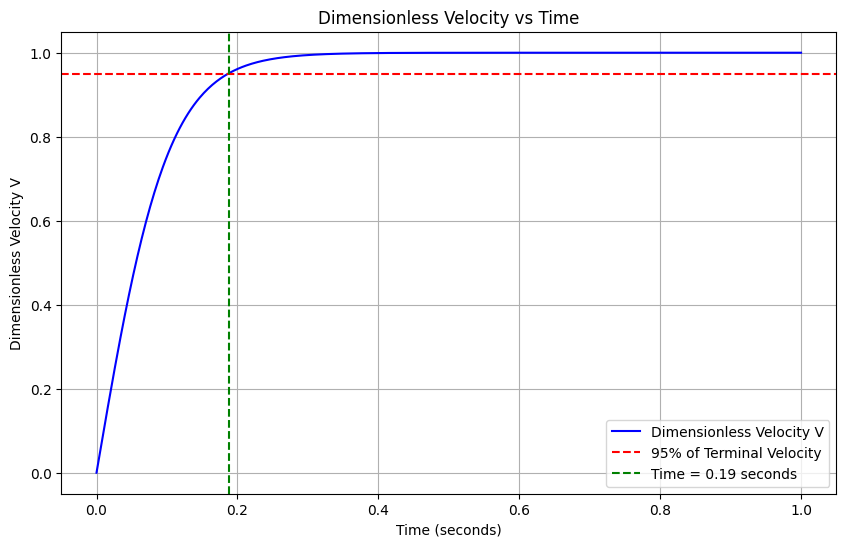

The mass achieves 95% of its terminal velocity at t = 0.19 seconds.
The slope at t = 0.19 seconds is 0.9275.


In [151]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, v, label=r"Dimensionless Velocity V", color='blue')
plt.axhline(0.95, color='red', linestyle='--', label="95% of Terminal Velocity")
plt.axvline(time_95, color='green', linestyle='--', label=f"Time = {time_95:.2f} seconds")
plt.xlabel('Time (seconds)')
plt.ylabel('Dimensionless Velocity V')
plt.title('Dimensionless Velocity vs Time')
plt.legend()
plt.grid(True)
plt.show()

print(f"The mass achieves 95% of its terminal velocity at t = {time_95:.2f} seconds.")
print(f"The slope at t = {time_95:.2f} seconds is {slope_at_time_95:.4f}.")

In [152]:
# Find the time when v=1
idx = np.where(v >= 0.999999)[0][0]
time_95 = t[idx]
slope_at_time_95 = model(v[idx], g)

when terminal velocity is reach we would expect the slope of the non-dimensioanl velocity == 0. Lets check that. 

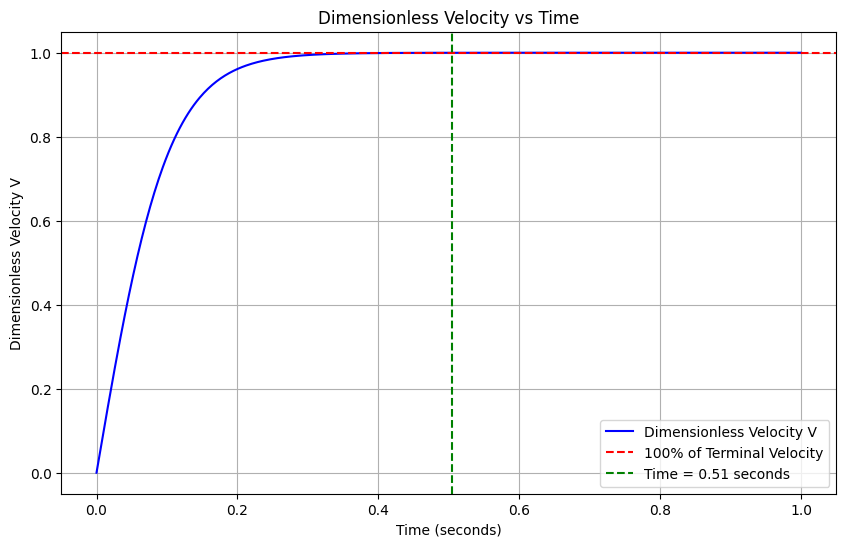

The mass achieves 100% of its terminal velocity at t = 0.51 seconds.
The slope at t = 0.51 seconds is 0.0020.


In [153]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, v, label=r"Dimensionless Velocity V", color='blue')
plt.axhline(1, color='red', linestyle='--', label="100% of Terminal Velocity")
plt.axvline(time_95, color='green', linestyle='--', label=f"Time = {time_95:.2f} seconds")
plt.xlabel('Time (seconds)')
plt.ylabel('Dimensionless Velocity V')
plt.title('Dimensionless Velocity vs Time')
plt.legend()
plt.grid(True)
plt.show()

print(f"The mass achieves 100% of its terminal velocity at t = {time_95:.2f} seconds.")
print(f"The slope at t = {time_95:.2f} seconds is {slope_at_time_95:.4f}.")